# Craigslist Data Cleaning Notebook

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline

## Function Definitions

In [135]:
def word_clean(df, col):
    word_lst = []
    
    for i in df[col]:
        hold = re.sub(r'[-.,\s+]', '', str(i))
        hold = hold.strip()
        word_lst.append(hold.lower())
        
    df[col] = word_lst                
    
    return

def word_frequency(df, col):
    words = list(df.loc[:, col])
    
    word_count = {}
    
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    
    word_df = pd.DataFrame.from_dict(word_count, orient='index', columns=['frequency'])
    word_df.sort_values(by='frequency', ascending=False, inplace=True)
    word_df = word_df.rename_axis('word').reset_index()
    
    return word_df

## Data Loading

In [136]:
craig = pd.read_csv('craigslist_vehicles_full.csv')
craig.drop(['url', 'image_url'], axis=1, inplace=True)
craig.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


## Manufacturer Cleaning

In [137]:
#dictionary of discovered manufacturer errors for cleaning.
make_cleaner = {
    'chevy':'chev',
    'chevrolet':'chev',
    'chev':'chevrolet',
    'mercedesbenz':'mercedes-benz',
    'mercedes-benz':'mercedes',
    'volkswagen':'vw',
    'infinity':'infiniti',
    'land rover':'land-rover',
    'landrover':'land-rover',
    'alfa-romeo':'alfa', 
    'aston-martin':'aston',
    'aston':'aston-martin'
}

#fixing the manufacturer names
#TODO: try removing .str so that aston doesn't get replaced with aston-martin-martin
for scrub in make_cleaner:
    craig['manufacturer'] = craig['manufacturer'].str.replace(scrub, make_cleaner[scrub])

In [138]:
######## ONLY RUN THIS CELL ONCE ########
print('There were {} motorcycles removed from the dataset.'.format(
    len(craig.loc[craig.manufacturer == 'harley']) + len(craig.loc[craig.manufacturer == 'harley-davidson'])))

#removing motorcycles from the dataset since we are focused on cars
craig.drop(craig.loc[craig.manufacturer == 'harley'].index, axis=0, inplace=True)
craig.drop(craig.loc[craig.manufacturer == 'harley-davidson'].index, axis=0, inplace=True)

There were 841 motorcycles removed from the dataset.


## Model Cleaning

In [139]:
#stripping all punctuation and making lowercase in 'make' column for cleaning
word_clean(craig, 'make')

### Master Cleaning Dictionary

In [140]:
#capturing errors in the model names for cleaning
#NOTE: list represents third iteration of top 240 models based on frequency
model_cleaner = {
    'silverado1500':'1500',
    '1500silverado':'1500',
    'silverado2500hd':'2500',
    'silverado2500':'2500',
    'explorersporttrac':'explorer',
    'sierra1500':'1500',
    '1500sierra':'1500',
    'f1504x4':'f150',
    'f150xlt':'f150',
    'f250superduty':'f250',
    'accord4doorsedan':'accord',
    'mustanggt':'mustang',
    'camryle':'camry',
    'focusse':'focus',
    'rangerxlt':'ranger',
    'fusionse':'fusion',
    'altima25s':'altima',
    'f150lariat':'f150',
    'sierra2500hd':'2500',
    'wranglerunlimited':'wrangler',
    'escapexlt':'escape',
    'civiclx':'civic',
    'explorerxlt':'explorer',
    'mustangconvertible':'mustang',
    'impalalt':'impala',
    'tahoelt':'tahoe',
    'civicex':'civic',
    'malibult':'malibu',
    'equinoxlt':'equinox',
    'corollale':'corolla',
    '2500silverado':'2500',
    'f350superduty':'f350',
    'f150fx4':'f150',
    'grandcherokeelaredo':'grandcherokee',
    'townandcountry':'town&country',
    'expeditioneddiebauer':'expedition',
    'yukonxl':'yukon',
    'accordex':'accord',
    '1500suburban':'suburban',
    'suburban1500':'suburban',
    'tacoma4x4':'tacoma',
    'accord2doorcoupe':'accord',
    '15004x4':'1500',
    'accordexl':'accord',
    'grandcaravansxt':'grandcaravan',
    'f250sd':'f250',
    'yukondenali':'yukon',
    'coopers':'cooper',
    'expeditionxlt':'expedition',
    '3series328i':'328i',
    'impalals':'impala',
    '4runnersr5':'4runner',
    'accordlx':'accord',
    'siennale':'sienna',
    'camryse':'camry',
    'towncountry':'town&country',
    'civiccoupe':'civic',
    'pilotexl':'pilot',
    'caravan':'grandcaravan',
    'cruzelt':'cruze',
    'taurusse':'taurus',
    'silverado3500hd':'3500',
    'civicsi':'civic',
    'camryxle':'camry',
    'odysseyexl':'odyssey',
    'superdutyf250':'f250',
    'corollas':'corolla',
    'tundra4wdtruck':'tundra',
    'malibuls':'malibu',
    'taurussel':'taurus',
    'sonatagls':'sonata',
    'altima25':'altima',
    'edgesel':'edge',
    'civiccoupeex':'civic',
    'cherokeelaredo':'cherokee',
    'f350sd':'f350',
    'jettatdi':'jetta',
    'durangoslt':'durango',
    'grandcherokeelimited':'grandcherokee',
    'camaross':'camaro',
    'altima254drsedan':'altima',
    'dakotaslt':'dakota',
    '1500slt':'1500',
    'silverado1500lt':'1500',
    'trailblazerls':'trailblazer',
    'siennaxle':'sienna',
    'superdutyf350srw':'f350',
    'montecarloss':'montecarlo',
    'oddysey':'odyssey',
    '300':'300c',
    '1500avalanche':'avalanche',
    'e250econoline':'e250',
    'e150econoline':'e150', 
    'bug':'beetle', 
    '3series335i':'335i',
    '430coupe':'f430', 
    '430':'f430', 
    '458':'458italia', 
    '430scuder':'f430', 
    'turboz280':'280z', 
    'zx280':'280z', 
    '280':'280z', 
    '2/80zx':'280z',
    'spider124':'124spider',
    'spyder124':'124spider', 
    '124sportspider':'124spider', 
    'x19bertone':'x1/9',
    'buyherepayhere':'nan',
    'towncountrytouring':'town&country', 
    'xvcrosstrek':'crosstrek', 
    'glclass':'gclass',
    '4x4':'nan', 
    'slclass':'sclass', 
    'alerooldsmobile':'oldsmobilealero',
    'z3roadster':'z3',
    'any':'nan',
    'all':'nan',
    'glkclass':'gclass',
    'transit250':'transit',
    'transit350':'transit',
    'fleetwoodbrougham':'fleetwood',
    'h2hummer':'hummerh2',
    '3i':'mazda3',
    'lasabre':'lesabre',
    'crownvic':'crownvictoria',
    'parkave':'parkavenue',
    'peterbilt379exhd':'peterbilt',
    'h3hummer':'hummerh3',
    '3hatchback':'mazda3'
}

for scrub in model_cleaner:
    craig['make'] = craig['make'].replace(scrub, model_cleaner[scrub])

In [141]:
craig.loc[(craig.manufacturer == 'mazda') & (craig.make == '5'), ['make']] = 'mazda5'
craig.loc[(craig.manufacturer == 'bmw') & (craig.make == '5'), ['make']] = '5series'
craig.loc[(craig.manufacturer == 'audi') & (craig.make == '5'), ['make']] = 'a5'
craig.loc[(craig.manufacturer == 'ford') & (craig.make == '5'), ['make']] = 'nan'
craig.loc[(craig.manufacturer == 'toyota') & (craig.make == '5'), ['make']] = 'nan'
craig.loc[(craig.manufacturer == 'acura') & (craig.make == '5'), ['make']] = 'nan'
craig.loc[(craig.manufacturer == 'mazda') & (craig.make == '6'), ['make']] = 'mazda6'
craig.loc[(craig.manufacturer == 'jeep') & (craig.make == '6'), ['make']] = 'cj6'
craig.loc[(craig.manufacturer == 'audi') & (craig.make == '6'), ['make']] = 'a6'
craig.loc[(craig.manufacturer == 'bmw') & (craig.make == '6'), ['make']] = '6series'
craig.loc[(craig.manufacturer == 'ford') & (craig.make == '6'), ['make']] = 'nan'
craig.loc[(craig.manufacturer == 'mazda') & (craig.make == '3'), ['make']] = 'mazda3'
craig.loc[(craig.manufacturer == 'jeep') & (craig.make == '3'), ['make']] = 'cj3'
craig.loc[(craig.manufacturer == 'audi') & (craig.make == '3'), ['make']] = 'a3'
craig.loc[(craig.manufacturer == 'bmw') & (craig.make == '3'), ['make']] = '3series'
craig.loc[(craig.manufacturer == 'ford') & (craig.make == '3'), ['make']] = 'nan'
craig.loc[(craig.make == '250') & 
          (craig.manufacturer == 'ford') & 
          ((craig.type == 'truck') | 
           (craig.type == 'pickup')), ['make']] = 'f250'
craig.loc[(craig.make == '250') & 
          (craig.manufacturer == 'ford') & 
          (craig.type == 'van'), ['make']] = 'e250'
craig.loc[(craig.make == '150') & 
          (craig.manufacturer == 'ford') & 
          ((craig.type == 'truck') | 
           (craig.type == 'pickup')), ['make']] = 'f150'
craig.loc[(craig.make == '150') & 
          (craig.manufacturer == 'ford') & 
          (craig.type == 'van'), ['make']] = 'e150'
craig.loc[(craig.manufacturer == 'fiat') & 
          (craig.make.str.contains('500')), 'make'] = 'fiat500'

### First Frequency Iteration

In [142]:
model_df = word_frequency(craig, 'make')
model_df.iloc[:10]

,word,frequency
0,nan,70832
1,1500,61465
2,f150,48295
3,2500,23828
4,f250,23189
5,accord,22847
6,mustang,19676
7,civic,19511
8,camry,17619
9,altima,15479


In [143]:
#Models were chosen from top frequencies 204-500
more_models = ['vibe', 'tribute', 'international', 'element', 'escalade', 'veloster', 'transam', 
               'spectra', 'chevelle', 'e350', 'sable', 'cx5', 'rx300', 'coupe', 'm3', 'cj7', 
               'lucerne', 'mariner', 'continental', 'a6', 'c300', 'galant', 'cc', 'e450', 'qx56', 
               'tiguan', 'econoline', 'cx9', 'matrix', 'outlander', 'jimmy', 'stratus', 'bonneville', 
               'cj5', 'rendezvous', 'gs300', 'eldorado', 's40', 'caprice', 'cx7', 'spark', 'rx330', 
               'gto', 'e320', 'sts', '530i', 'rx8', 'mclass', 'freestar', 'rdx', 'freestyle', 'ats', 
               'g6', 'encore', 'escort', '525i', 'verano', '528i', 'sprinter', 'fx35', 'venture', 
               'rx', 'q5', 'cayenne', 'gx470', 'venza', '328xi', 'parkavenue', 'g35', 'montana', 
               'magnum', 'freightliner', 'juke', 'prelude', 'modela', 'savana', '370z', '750li', 
               'intrepid', 's80', 'sunfire', 'genesis', 'g37', 'is300', '300zx', '330i', 'integra', 
               'q7', 'touareg', 'rabbit', 'ml350', '325xi', 'q50', 'aura', 'rsx', 'c230', 'lumina', 
               'windstar', 's4', 'protege', 'solara', 'cougar', 'torrent', 'mks', 'astro', 'sedan', 
               'xtype', 'saab93', 'ls430', 'trax', 'a3', 's2000', 'sclass', '535i', 'tracker', 'sl2', 
               'tiburon', 'k10', '330ci', 'ls420', 'is350', '325ci', 'xc70', 'isuzunpr', 'stype', 'frs', 
               'plymouth', 'gs350', 'e320', 'celica', 'g5', 'spider', 'stelvio', 'racecar', 'gtv', 
               'milanogold', 'milano', 'graduate', 'giuliati', 'giulia', '4c', 'spastelvio', 'romeo164', 
               'gtv6', '1641s', 'sprint', 'giulietta', 'quidrofilio', 'duetto', '8c', '720', '280z', 
               '411', '620', '240z', '521', '510', 'hotrod', 'b210', '1320', '1600', 'fairlady', 
               '210', '1400', '300z', '260z', '2000', '710', 'goat', 'f10', 'zcar', '200sx', '410', 
               '240', '260', '160', '1200', '1300', 'b110', '520', '311', '124spider', 
               'abarth', 'spyder', '128', '1100', 'tipo', 'x1/9', '850', 'ardita2500', 'transformabile', 
               'topolino', '600', '124special', '131', 'tempra', '125p', 'multipla', 'xtype',
               'xseries', 'fpace', 'xf', 'xk', 'xj', 'fiat500'
              ]

top_models = list(model_df.loc[:, 'word'].head(203))

print('Models to add to the list: {}'.format(len(more_models)))
print('Top cleaned models from frequency dataframe: {}'.format(len(top_models)))

for i in more_models:
    if i in top_models:
        more_models.pop(more_models.index(i))
    elif i not in top_models:
        top_models.append(i)    
        
print('Edited length of more_models (i.e. removed duplicates from top 204): {}'.format(len(more_models)))
print('Total number of models for inf_model column assignment: {}'.format(len(top_models)))

Models to add to the list: 205
Top cleaned models from frequency dataframe: 203
Edited length of more_models (i.e. removed duplicates from top 204): 198
Total number of models for inf_model column assignment: 395


#### Imputation From First Iteration

In [144]:
for i in top_models:
    craig.loc[craig.make.str.contains(i), 'inf_model'] = i

In [145]:
missing_models = craig.loc[craig.inf_model.isna(), :]
raw_missing_models = craig.loc[craig.make == 'nan']
print('Total number of NaNs in the inf_model column: {}'.format(len(missing_models)))
print('Total number of NaNs in the raw model column: {}\n'.format(len(raw_missing_models)))
#print('Manufacturer count for missing models:\n{}'.format(missing_models.manufacturer.value_counts()))
#prc_missing = (missing_models.manufacturer.value_counts() / craig.manufacturer.value_counts()) * 100
#print('\nPercentage of missing manufacturers from inf_model:\n{}'.format(prc_missing.sort_values(ascending=False)))

Total number of NaNs in the inf_model column: 176096
Total number of NaNs in the raw model column: 70832



### Second Frequency Iteration

In [146]:
missing_word_freq = word_frequency(missing_models, 'make')

In [147]:
even_more_models = list(missing_word_freq.loc[:, 'word'].head(120))

print('Models to add to the list: {}'.format(len(even_more_models)))

for i in even_more_models:
    if i in top_models:
        even_more_models.pop(even_more_models.index(i))
    elif i not in top_models:
        top_models.append(i)    
        
print('Edited length of even_more_models (i.e. removed duplicates from top 204): {}'.format(len(even_more_models)))
print('Total number of models for inf_model column assignment: {}'.format(len(top_models)))

Models to add to the list: 120
Edited length of even_more_models (i.e. removed duplicates from top 204): 120
Total number of models for inf_model column assignment: 515


#### Imputation from Second Iteration

In [148]:
for i in top_models:
    craig.loc[craig.make.str.contains(i), 'inf_model'] = i

In [149]:
missing_models = craig.loc[craig.inf_model.isna(), :]
raw_missing_models = craig.loc[craig.make == 'nan']
print('Number of NaNs not captured by the model list: {:,}'.format((len(missing_models))))
print('Number of NaNs in the raw model column: {:,}'.format(len(raw_missing_models)))
print('Total number of NaNs in the inf_model column: {:,}\n'.format(len(raw_missing_models) + len(missing_models)))
#print('Manufacturer count for missing models:\n{}'.format(missing_models.manufacturer.value_counts()))
#prc_missing = (missing_models.manufacturer.value_counts() / craig.manufacturer.value_counts()) * 100
#print('\nPercentage of missing manufacturers from inf_model:\n{}'.format(prc_missing.sort_values(ascending=False)))

Number of NaNs not captured by the model list: 99,344
Number of NaNs in the raw model column: 70,832
Total number of NaNs in the inf_model column: 170,176



## Lat, Long and State  Imputation/Cleaning

In [150]:
#creating a shortened lat and long to try imputing states with more generalized locations
craig['lat_short'] = craig['lat']
craig['long_short'] = craig['long']
craig = craig.round({'lat_short':2, 'long_short':2})

### Master State df

In [151]:
#creating a dataframe to store lat long information for each state to impute
state= pd.DataFrame()

state['state_code'] = craig.state_code.unique()
state['state_name'] = craig.state_name.unique()

for name in state.state_code:
    hold = craig.loc[craig.state_code == name]
    state.loc[state.state_code == name, 'min_lat'] = hold.lat_short.min()
    state.loc[state.state_code == name, 'max_lat'] = hold.lat_short.max()
    state.loc[state.state_code == name, 'avg_lat'] = hold.lat.mean()
    state.loc[state.state_code == name, 'min_long'] = hold.long_short.min()
    state.loc[state.state_code == name, 'max_long'] = hold.long_short.max()
    state.loc[state.state_code == name, 'avg_long'] = hold.long.mean()

#removes the unique value for null rows
state.dropna(inplace=True)
state.head()

,state_code,state_name,min_lat,max_lat,avg_lat,min_long,max_long,avg_long
0,SD,South Dakota,42.48,45.94,43.788899,-103.99,-96.46,-98.844710
1,IA,Iowa,40.40,43.50,42.004707,-96.55,-90.18,-92.767073
2,IL,Illinois,37.01,42.50,40.877821,-91.44,-87.53,-88.794652
4,TX,Texas,25.86,36.45,30.447669,-106.64,-93.77,-98.270029
5,KS,Kansas,37.00,39.99,38.146695,-101.90,-94.60,-96.255167


### First Scatter Plot

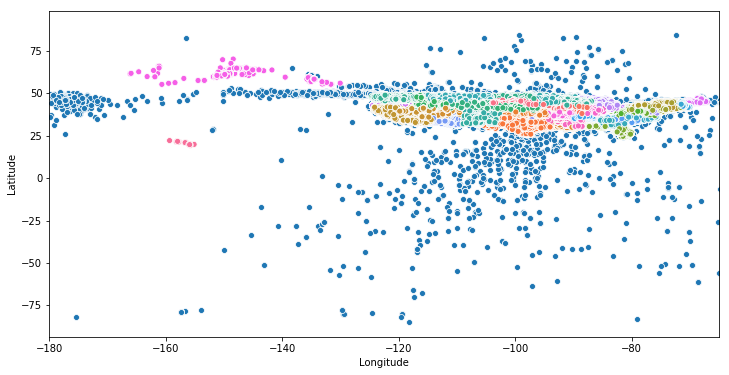

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    craig.loc[craig.state_code.isna()].long,
    craig.loc[craig.state_code.isna()].lat,
    sizes=(100, 70000),
    legend=False
)
sns.scatterplot(
    craig.long,
    craig.lat,
    hue=craig['state_code'],
    sizes=(100, 70000),
    legend=False
)
plt.xlim(-180, -65)
#plt.ylim(22, 55)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The rows in blue are the ~58,000 rows without a state code. Most all of the lat/longs to the north of the United States are likely Canadian postings due to the fact that the scraper pulled all regions from North America (double checked the code from @AustinReese GitHub repo for the project). The postings to the south of the U.S. are more of a mystery at this point. Once I handle the Canadian postings, I can double check the cities and work on an imputation plan from there.

In [152]:
canada = [
    'vancouver',
    'abbotsford',
    'whistler',
    'victoria',
    'nanaimo',
    'kelowna',
    'comoxvalley',
    'kamloops',
    'toronto',
    'sunshine',
    'princegeorge',
    'montreal',
    'kootenays',
    'calgary',
    'edmonton',
    'cariboo',
    'ftmcmurray',
    'ottawa',
    'quebec',
    'saskatoon',
    'winnipeg',
    'skeena',
    'peace',
    'hamilton',
    'reddeer',
    'londonon',
    'peterborough',
    'lethbridge',
    'brantford',
    'guelph',
    'yellowknife',
    'kitchener',
    'newfoundland',
    'barrie',
    'owensound',
    'sudbury',
    'territories'
]
for region in canada:
    craig.loc[craig.city == region, 'state_code'] = 'CAN'
    craig.loc[craig.city == region, 'state_name'] = 'Canada'
    
craig.loc[craig.state_code.isna()].city.value_counts().sum()

2055

### Second Scatter (canada identified)

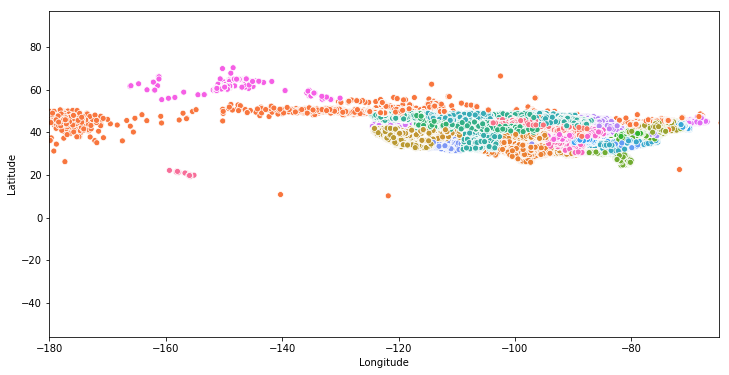

In [115]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    craig.long,
    craig.lat,
    hue=craig['state_code'],
    sizes=(100, 70000),
    legend=False
)
plt.xlim(-180, -65)
#plt.ylim(22, 55)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### inf_state_code Creation

In [153]:
for city in craig.city.unique():
    states = craig.loc[craig.city == city, 'state_code'].value_counts().to_dict()
    states_df = pd.DataFrame.from_dict(states, orient='index', columns=['frequency'])
    states_df.sort_values(by='frequency', ascending=False, inplace=True)
    craig.loc[(craig.city == city), 'inf_state_code'] = states_df.index[0]

craig.inf_state_code.isna().value_counts()

False    1722224
Name: inf_state_code, dtype: int64

The new column 'inf_state_code' will fill in states for postings with only a city listed and should help eliminate city/state errors. There are a lot of cities that are mis-tied to states. The code above will generate a state code for each city based on the frequency of the states that it most commonly appears. The code cells below are shortened to put them side by side, but the left compares the original state codes where the city of Denver is posted and the right is the inf_state_code column where only Colorado is shown.

In [154]:
craig.loc[craig.city == 'denver'].state_code.value_counts()

CO    7367
AZ      47
TX      43
KS      35
CA      24
NE      23
NM      23
OK      21
WY      16
FL      16
WA      11
UT      11
MT       8
NV       5
OR       4
ID       4
MN       4
TN       2
MO       2
IA       2
NC       2
AR       1
LA       1
OH       1
NY       1
IN       1
MI       1
SD       1
GA       1
MD       1
Name: state_code, dtype: int64

In [155]:
craig.loc[craig.city == 'denver'].inf_state_code.value_counts()

CO    7681
Name: inf_state_code, dtype: int64

### U.S. lat/long Cleaning
Now that the null states are infilled based on the city name, I can clean the lat/longs for those rows by imputing the average lat/long that was calculated for each state above. I will put these lat/longs directly into the original columns 

In [156]:
#starting point to confirm that the imputation was successful
craig.loc[craig.state_code.isna(), ['lat' ,'long']].describe()

,lat,long
count,2055.000000,2055.000000
mean,13.048522,-80.547039
std,37.068419,46.547084
min,-84.810047,-999.999999
25%,-11.920068,-106.844923
50%,24.190760,-90.813502
75%,43.103155,-70.033766
max,84.668794,139.706099


In [157]:
#TODO: rewrite this to infill the average lat/long values based on the unique city values
#will need to build averages for the rows that initially had a null state_code
state = state.loc[state.state_code != 'CAN']
for st in state.state_code:
    craig.loc[(craig.state_code.isna()) & 
              (craig.inf_state_code == st), 
              'lat'] = state.loc[state.state_code == st, 'avg_lat'].values[0]
    craig.loc[(craig.state_code.isna()) & 
              (craig.inf_state_code == st), 
              'long'] = state.loc[state.state_code == st, 'avg_long'].values[0]

craig.loc[craig.state_code.isna(), ['lat' ,'long']].describe()

,lat,long
count,2055.000000,2055.000000
mean,39.082814,-91.920773
std,5.972373,17.581223
min,28.447884,-149.158586
25%,35.529539,-98.270029
50%,40.369106,-86.163910
75%,43.050385,-78.007132
max,61.656507,-69.970467


The 2055 rows with missing state codes now have correct lat/longs that represent the average of each state in the dataset. This could have been done with a similar method using the averages for each city to be more accurate.

### Canada lat/long Cleaning

Now that the US states have fixed lat/longs I still need to fix the Canadian lat/longs. Since none of the Canadian cities had a state_code and a bogus lat/long, the best option is probably to retrieve the lat/longs for the city center from the internet and use those to impute. This cleaning on the state_codes and lat/long will be very helpful for increasing the effectiveness of the models and by retaining ~58,000 rows of information.

In [158]:
canada_lat = {
    'vancouver':49.2827,
    'abbotsford':49.0504,
    'whistler':50.1163,
    'victoria':48.4284,
    'nanaimo':49.1659,
    'kelowna':49.8880,
    'comoxvalley':49.7064,
    'kamloops':50.6745,
    'toronto':43.6532,
    'sunshine':49.7604,
    'princegeorge':53.9171,
    'montreal':45.5017,
    'kootenays':50.9769,
    'calgary':51.0447,
    'edmonton':53.5461,
    'cariboo':52.4032,
    'ftmcmurray':56.7267,
    'ottawa':45.4215,
    'quebec':52.9399,
    'saskatoon':52.1332,
    'winnipeg':49.8951,
    'skeena':53.7267,
    'peace':56.2331,
    'hamilton':43.2557,
    'reddeer':52.2690,
    'londonon':42.9849,
    'peterborough':44.3091,
    'lethbridge':49.6956,
    'brantford':43.1394,
    'guelph':43.5448,
    'yellowknife':62.4540,
    'kitchener':43.4516,
    'newfoundland':53.1355,
    'barrie':44.3894,
    'owensound':44.5690,
    'sudbury':46.4917,
    'territories':64.8255
}

In [159]:
canada_long = {
    'vancouver':-123.1207,
    'abbotsford':-122.3045,
    'whistler':-122.9574,
    'victoria':-123.3656,
    'nanaimo':-123.9401,
    'kelowna':-119.4960,
    'comoxvalley':-125.0219,
    'kamloops':-120.3273,
    'toronto':-79.3832,
    'sunshine':-123.7644,
    'princegeorge':-122.7497,
    'montreal':-73.5673,
    'kootenays':-115.9592,
    'calgary':-114.0719,
    'edmonton':-113.4938,
    'cariboo':-123.4554,
    'ftmcmurray':-111.3790,
    'ottawa':-75.6972,
    'quebec':-73.5491,
    'saskatoon':-106.6700,
    'winnipeg':-97.1384,
    'skeena':-127.6476,
    'peace':-117.3341,
    'hamilton':-79.8711,
    'reddeer':-113.8116,
    'londonon':-81.2453,
    'peterborough':-78.3197,
    'lethbridge':-112.8451,
    'brantford':-80.2644,
    'guelph':-80.2482,
    'yellowknife':-114.3718,
    'kitchener':-80.4925,
    'newfoundland':-57.6604,
    'barrie':-79.6903,
    'owensound':-80.9406,
    'sudbury':-80.9930,
    'territories':-124.8457
}

In [160]:
print(craig.loc[craig.state_code == 'CAN', ['lat', 'long']].describe())

for city in canada:
    craig.loc[craig.city == city, 'lat'] = canada_lat[city]
    craig.loc[craig.city == city, 'long'] = canada_long[city]

print(craig.loc[craig.state_code == 'CAN', ['lat' ,'long']].describe())

                lat          long
count  57108.000000  57108.000000
mean      48.801052   -118.466029
std        1.823378     14.966948
min      -48.837036   -179.956055
25%       49.109026   -123.119943
50%       49.204516   -122.926356
75%       49.272012   -122.667931
max       90.000000      7.325773
                lat          long
count  57108.000000  57108.000000
mean      49.252054   -118.134090
std        2.007610     13.181431
min       42.984900   -127.647600
25%       49.050400   -123.365600
50%       49.282700   -122.957400
75%       50.116300   -120.327300
max       64.825500    -57.660400


### Third Scatter (all fixed)

The imputation of Canadian lat/longs worked well. It's reassuring to see that overall the descriptive statistics for lat/long did not change much, except for the extreme min and max that could throw off location correlations. 

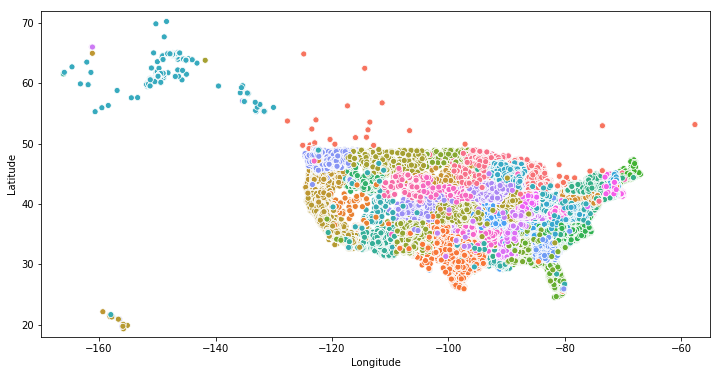

In [132]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    craig.long,
    craig.lat,
    hue=craig['inf_state_code'],
    sizes=(100, 70000),
    legend=False
)
plt.xlim(-170, -55)
plt.ylim(18, 72)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The new scatter of states colored by state code is MUCH CLEANER than it was before. There are no more random points in the ocean or in South America. 

It looks like using the most frequent state for each uniqie city worked for the most part. There are a good amount of datapoints that seem to bleed over into other states or are plotted entirely in another state. I am wondering if these are examples of postings that someone has posted into another cities craigslist, but the vehicle is actually in another state. For instance, someone with a car for sale in southern Oklahoma may want to post their vehicle in the Dallas craigslist region. That would mean the inputted vehicle location information is in Oklahoma, but it will appear related to Dallas. There are a couple of other potential sources of the error. Cities are actually just craigslist defined 'regions' and not the actual cities.

(TODO)Maybe a better way to mediate this would be to only infer state codes for the ~2000 rows of missing values and then assign lat/long values to those and the Canadian rows to limit the error.

## Data Serialization

In [161]:
craig.to_csv(r'/Users/brien/Desktop/Thinkful/Bootcamp Unit 3/craig.csv', index=None, header=True)